In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.evaluate import mcnemar_table
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [25]:
df = pd.read_csv('dataset/heart.csv')
df.shape

(303, 14)

In [26]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Realizar a Análise Exploração de Dados (EAD) com pré-processamento

In [27]:
X = df.drop(['output'], axis=1)
y = df['output']

In [28]:
clf = DecisionTreeClassifier(max_depth=3)
kf = StratifiedKFold(n_splits=10)#, shuffle=True)

In [29]:
for fold, (train, test) in enumerate(kf.split(X, y)): 
    clf.fit(X.iloc[train], y[train])
    print(accuracy_score(y[test], clf.predict(X.iloc[test])))

0.8709677419354839
0.8064516129032258
0.9032258064516129
0.8333333333333334
0.8
0.7
0.7666666666666667
0.8666666666666667
0.7
0.8333333333333334


[Text(0.5, 0.875, 'cp <= 0.5\ngini = 0.496\nsamples = 273\nvalue = [124, 149]\nclass = healthy'),
 Text(0.25, 0.625, 'caa <= 0.5\ngini = 0.402\nsamples = 129\nvalue = [93, 36]\nclass = sick'),
 Text(0.125, 0.375, 'thall <= 2.5\ngini = 0.499\nsamples = 59\nvalue = [28, 31]\nclass = healthy'),
 Text(0.0625, 0.125, 'gini = 0.334\nsamples = 33\nvalue = [7, 26]\nclass = healthy'),
 Text(0.1875, 0.125, 'gini = 0.311\nsamples = 26\nvalue = [21, 5]\nclass = sick'),
 Text(0.375, 0.375, 'trtbps <= 109.0\ngini = 0.133\nsamples = 70\nvalue = [65, 5]\nclass = sick'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = sick'),
 Text(0.4375, 0.125, 'gini = 0.088\nsamples = 65\nvalue = [62, 3]\nclass = sick'),
 Text(0.75, 0.625, 'oldpeak <= 1.95\ngini = 0.338\nsamples = 144\nvalue = [31, 113]\nclass = healthy'),
 Text(0.625, 0.375, 'age <= 55.5\ngini = 0.274\nsamples = 128\nvalue = [21, 107]\nclass = healthy'),
 Text(0.5625, 0.125, 'gini = 0.121\nsamples = 77\nvalue = [5, 72]\nclas

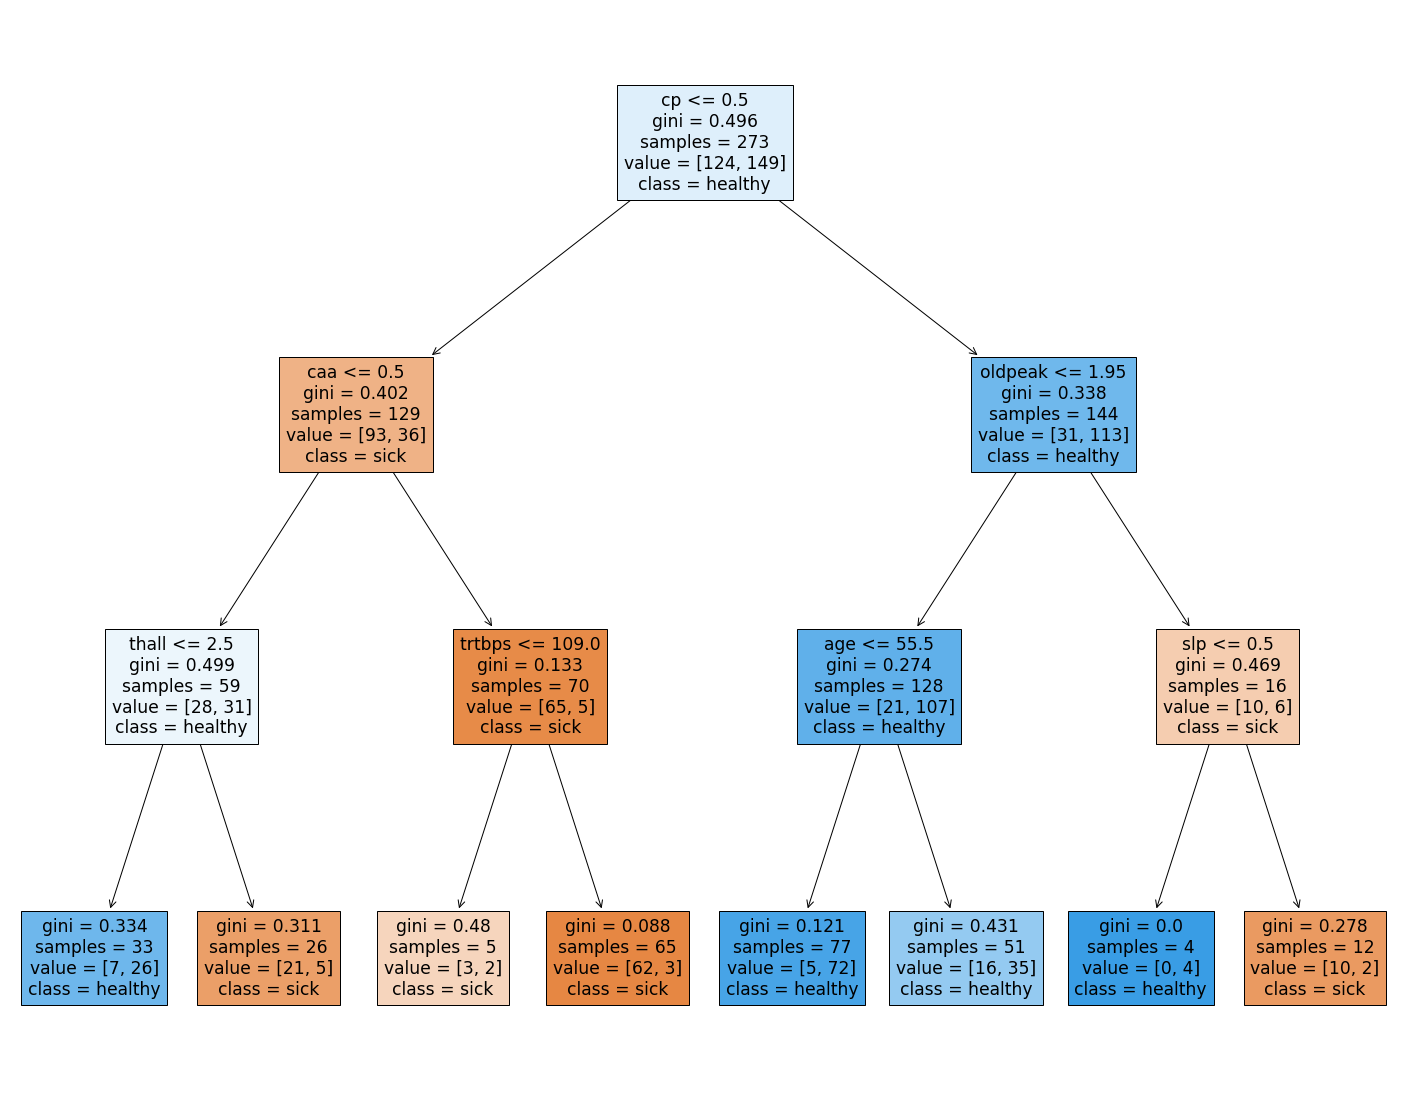

In [30]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, 
               feature_names=df.columns,
               class_names={0: 'sick', 1:'healthy'},
               filled=True)

In [31]:
models = {
    "KNN" : (KNeighborsClassifier(), { "n_neighbors": [1,3,5] }),
    "DT": (DecisionTreeClassifier(), { "max_depth": [3,5,7] })    
}

X = df.drop(columns = "output").to_numpy()
y = df['output']

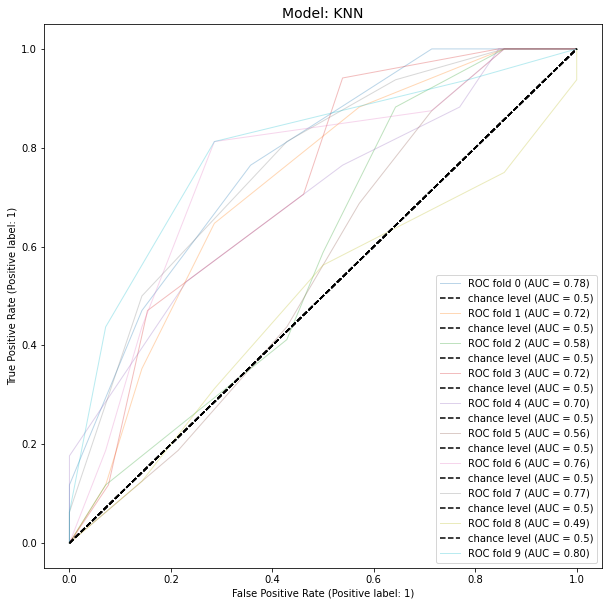

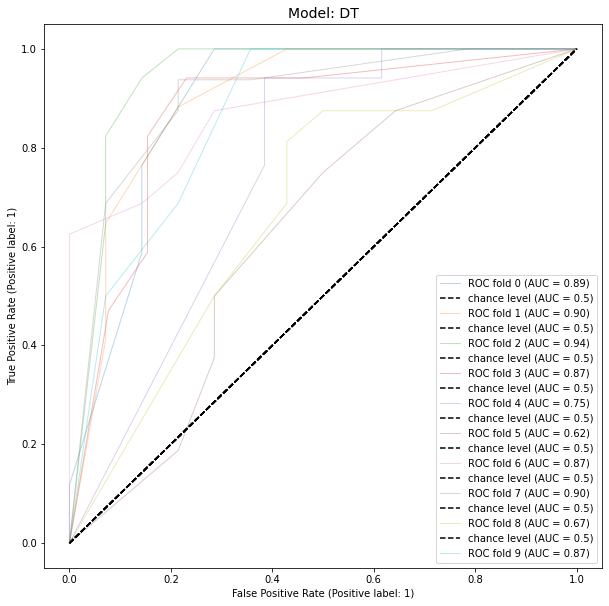

In [32]:
score = {}
for model, (clf, parameters) in models.items():
    
    if model not in score:
        score[model] = []
        
    fig, ax = plt.subplots(figsize=(10, 10))
    for fold, (train, test) in enumerate(kf.split(X, y)):
        best = GridSearchCV(clf, parameters, cv=kf, scoring="accuracy", return_train_score=True)
        best.fit(X[train], y[train])
        s = accuracy_score(best.predict(X[test]), y[test])
        score[model].append(s)
        
        viz = RocCurveDisplay.from_estimator(
            best,
            X[test],
            y[test],
            name=f"ROC fold {fold}",
            alpha=0.3,
            lw=1,
            ax=ax,
        ) 

        ax.set_title(f'Model: {model}', fontsize = 14)
        ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

In [33]:
print("Mean\n", pd.DataFrame.from_dict(score).mean())
print("\nStd\n", pd.DataFrame.from_dict(score).std())

Mean
 KNN    0.653548
DT     0.798065
dtype: float64

Std
 KNN    0.085209
DT     0.090354
dtype: float64


# mcnemar test

In [34]:
# Class labels predicted by model RandomForestClassifier
y_KNN = pd.DataFrame.from_dict(correct).KNN

# Class labels predicted by model DecisionTreeClassifier
y_DT = pd.DataFrame.from_dict(correct).DT

tb = mcnemar_table(y_target=y, 
                   y_model1=y_KNN, 
                   y_model2=y_DT)

ct=pd.DataFrame(tb, columns=["KNN positive", "KNN negative"])
ct.index=["DT positive", "DT negative"] 
ct

NameError: name 'correct' is not defined